## File Path

In [1]:
usa_accident_file_path=r"C:\Users\dhvan\Documents\Big Data\Project\US_Accidents_Dec19.csv";

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)  
import plotly.graph_objects as plt_go
import math
import findspark
findspark.init()
import pyspark

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('project').getOrCreate()
reader = spark.read
reader.option("header","true")
reader.option("inferSchema","true")
us_accident_spark = reader.csv(r"C:\Users\dhvan\Documents\Big Data\Project\US_Accidents_Dec19.csv")
us_accident_spark.createOrReplaceTempView("US_Accidents")

## Reading data

In [123]:
usa_accident_data=pd.read_csv(usa_accident_file_path)
usa_accident_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [124]:
usa_accident_data.shape

(2974335, 49)

## Data Preprocessing

### By looking at the data, we can clearly say that columns Civil_Twilight, Nautical_Twilight and Astronomical_Twilight are irrelevent for our analysis. So, we can drop these columns

In [125]:
usa_accident_data_filtered=usa_accident_data.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
usa_accident_data_filtered.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,False,False,False,True,False,Day


In [126]:
usa_accident_data_filtered.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

In [127]:
columns_null_values_count=usa_accident_data_filtered.isnull().sum(axis = 0)
columns_null_values_count

ID                         0
Source                     0
TMC                   728071
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              2246264
End_Lng              2246264
Distance(mi)               0
Description                1
Number               1917605
Street                     0
Side                       0
City                      83
County                     0
State                      0
Zipcode                  880
Country                    0
Timezone                3163
Airport_Code            5691
Weather_Timestamp      36705
Temperature(F)         56063
Wind_Chill(F)        1852623
Humidity(%)            59173
Pressure(in)           48142
Visibility(mi)         65691
Wind_Direction         45101
Wind_Speed(mph)       440840
Precipitation(in)    1998358
Weather_Condition      65932
Amenity                    0
Bump                       0
Crossing      

### Dropping columns with more than 500000 missing values

In [128]:
for column in usa_accident_data_filtered.columns:
    if columns_null_values_count[column]>500000:
        usa_accident_data_filtered=usa_accident_data_filtered.drop([column],axis=1)

In [129]:
usa_accident_data_filtered.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,False,False,False,True,False,Day


### Fetching Year, Month and Week Day from Start time of accident

In [130]:
usa_accident_data_filtered['Year']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).year
usa_accident_data_filtered['Month']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).month
usa_accident_data_filtered['Week_day']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).dayofweek
usa_accident_data_filtered['Week']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).week
usa_accident_data_filtered['Hour']=pd.DatetimeIndex(usa_accident_data_filtered['Start_Time']).hour

In [131]:
usa_accident_data_filtered.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Week_day,Week,Hour
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,Night,2016,2,0,6,5
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,Night,2016,2,0,6,6
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,True,False,Night,2016,2,0,6,6
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,Night,2016,2,0,6,7
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,True,False,Day,2016,2,0,6,7


### Finding correlation between columns

In [132]:
# corr = usa_accident_data_filtered.corr(method='pearson') 
# fig, ax = plt.subplots(figsize=(9,9)) 
# sns.heatmap(corr, ax = ax,cmap='coolwarm',  robust=True)
# ax.set_title('Correlation')
# plt.show()

# General Functions For Analysis

In [133]:
def column_group_count(df,column):
    new_df=pd.DataFrame(df.groupby(column).size()).reset_index()
    new_df.columns=[column,'Number_of_accidents']
    return new_df

def column_group_percent(df,column):
    count_groupby=column_group_count(df,column)
    total=count_groupby['Number_of_accidents'].sum()
    count_groupby['Percent_of_accidents']=(count_groupby['Number_of_accidents']/total)*100
    count_groupby=count_groupby.drop('Number_of_accidents',axis=1)
    return count_groupby

def accidents_per_severity(df,severity,feature):
    severity_df=df[df['Severity']==severity]
    return column_group_count(severity_df,feature)

def bar_plot_by_severity(df,feature,subplot,severity,rotation):
    subplot.set_title("Accidents Per "+ feature + " on Severity "+ str(severity) )
    subplot.set_xlabel(feature)
    subplot.set_ylabel("Accident Count")
    subplot.tick_params('x',labelrotation=rotation)
    subplot.bar(df[feature],df['Number_of_accidents'])

# Analysis

### From where the data came?

In [134]:
data_source_df=column_group_count(usa_accident_data_filtered,'Source')

In [135]:
data_source_df.sort_values(ascending=False,by='Number_of_accidents')

,Source,Number_of_accidents
1,MapQuest,2204098
0,Bing,728071
2,MapQuest-Bing,42166


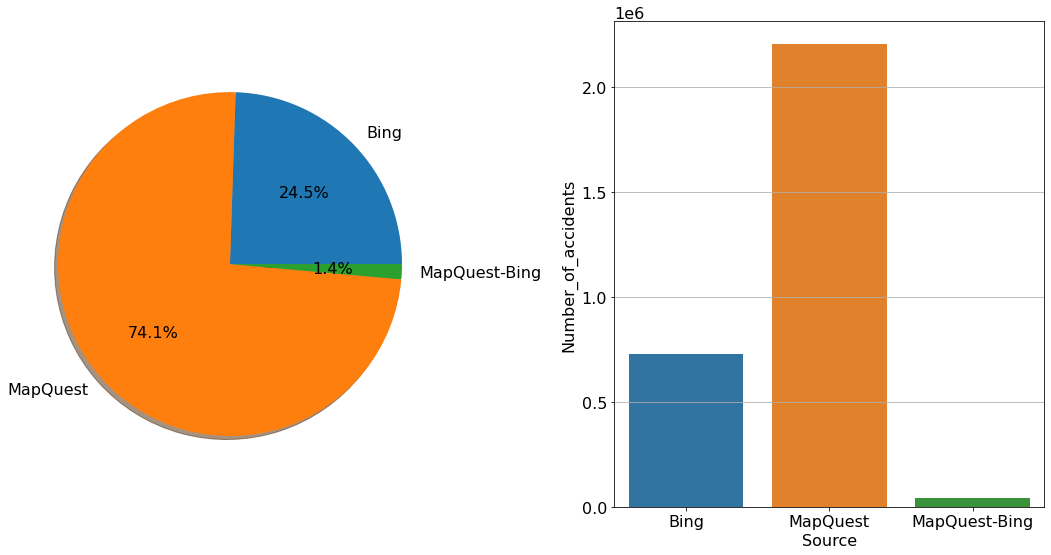

In [136]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.pie(data_source_df['Number_of_accidents'],labels= ['Bing','MapQuest','MapQuest-Bing'],autopct = ('%1.1f%%'),shadow=True)
ax2.set_xlabel('Type of source')
ax2.set_ylabel('Number of Accidents')
ax2.grid()
sns.barplot(data_source_df['Source'],data_source_df['Number_of_accidents'])
plt.tight_layout()
plt.show()

### How many accidents occur by each severity?

 Here, Severity "a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)." Here is the distribution of the severity values. 

In [137]:
severity_df=column_group_count(usa_accident_data_filtered,'Severity')
severity_df = severity_df.sort_values(ascending=False,by='Number_of_accidents')
severity_df

,Severity,Number_of_accidents
1,2,1993410
2,3,887620
3,4,92337
0,1,968


As we can see that most of the accidents has severity 2 or 3 and more than 2/3rd of accidents occured had severity 2.    

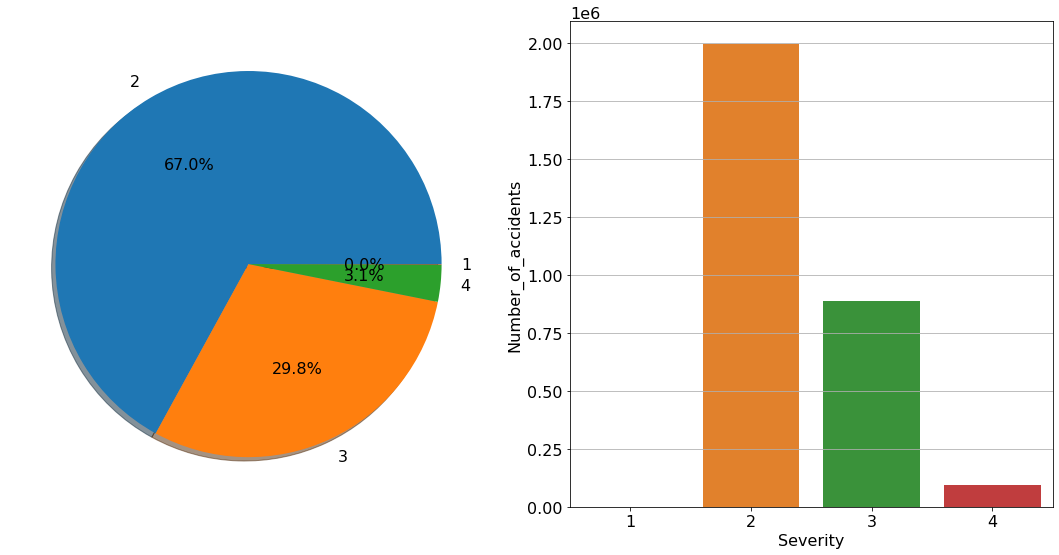

In [138]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.pie(severity_df['Number_of_accidents'],labels= ['2','3','4','1'],autopct = ('%1.1f%%'),shadow=True)
ax2.set_xlabel('Severity')
ax2.set_ylabel('Number of Accidents')
ax2.set_xticks(range(1,5))
ax2.grid()
sns.barplot(severity_df['Severity'],severity_df['Number_of_accidents'])
plt.tight_layout()
plt.show()

### How many accidents occur in each state?

In [139]:
per_state_accidents_count=column_group_count(usa_accident_data_filtered,'State')
per_state_accidents_count = per_state_accidents_count.sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
per_state_accidents_count

,State,Number_of_accidents
0,CA,663204
1,TX,298062
2,FL,223746
3,SC,146689
4,NC,142460
5,NY,137799
6,PA,90395
7,MI,88694
8,IL,86390
9,GA,83620


Text(0.5, 1.0, 'Number of accidents per state')

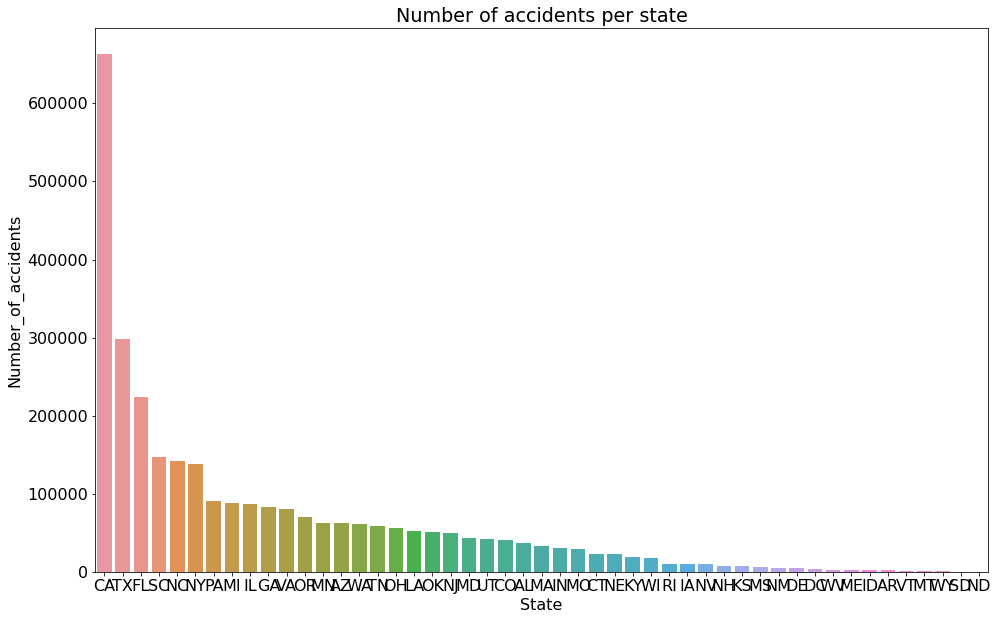

In [140]:
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Number_of_accidents",data=per_state_accidents_count)
plt.title('Number of accidents per state')

As we can see California has highest number of accidents in last 3 years, which is almost the one forth of the total accidents in United States!
We can plot this on map

In [141]:
fig = plt_go.Figure(data=plt_go.Choropleth(
    locations=per_state_accidents_count['State'],
    z = per_state_accidents_count['Number_of_accidents'].astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa',
)

fig.show()

# Severity of accidents in each state

Text(0.5, 1.0, 'Number of accidents per state with Severity 1')

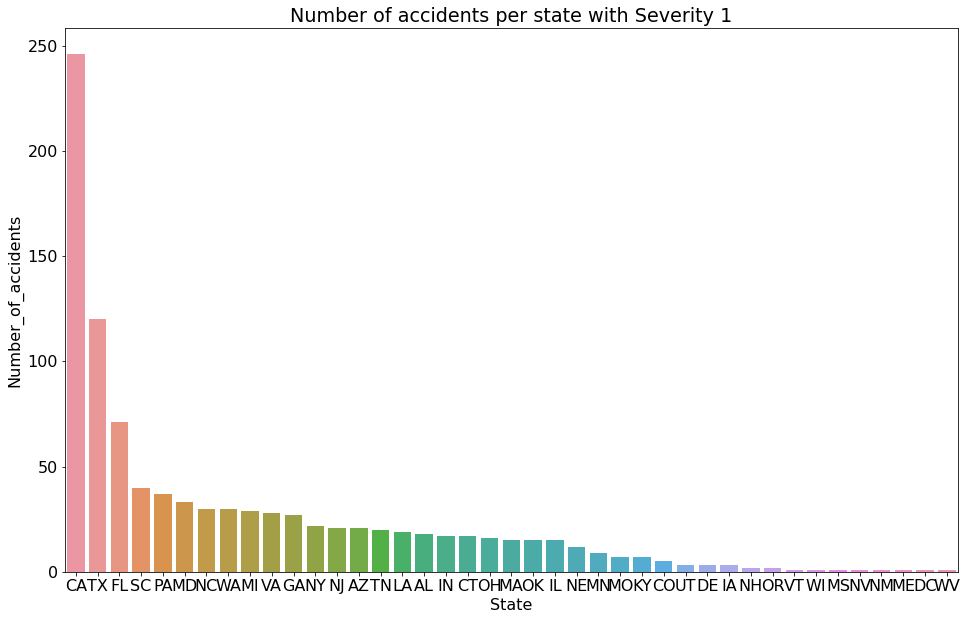

In [142]:
accidents_per_state_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_1)
plt.title('Number of accidents per state with Severity 1')

Text(0.5, 1.0, 'Number of accidents per state with Severity 2')

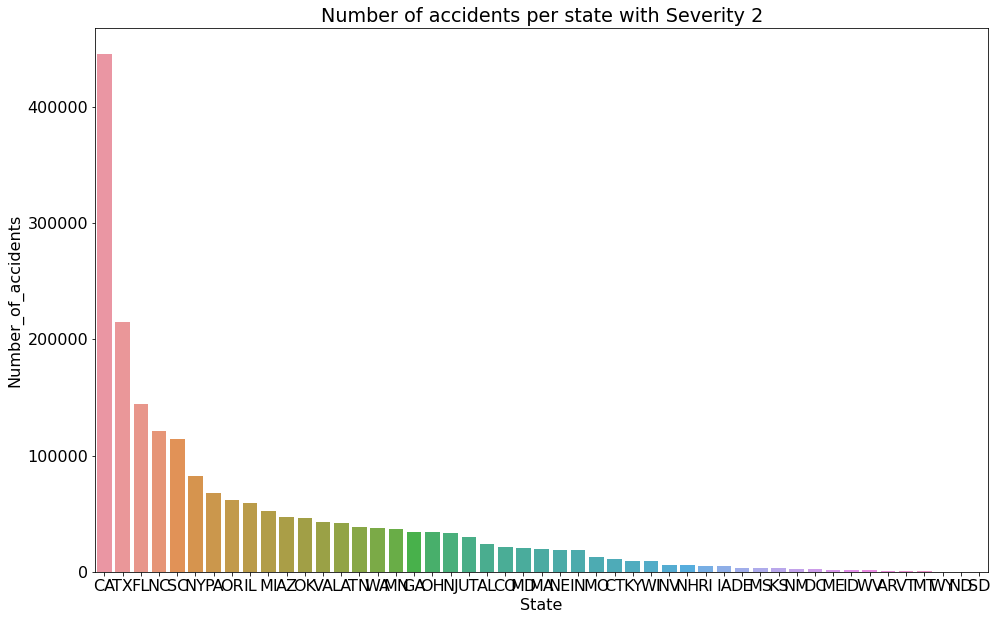

In [143]:
accidents_per_state_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_2)
plt.title('Number of accidents per state with Severity 2')

Text(0.5, 1.0, 'Number of accidents per state with Severity 3')

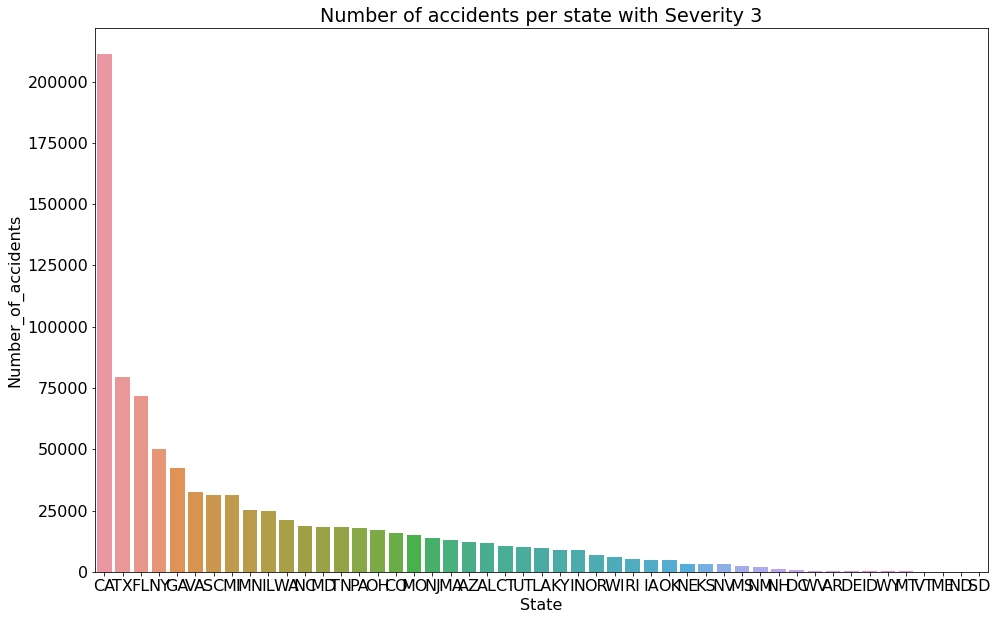

In [144]:
accidents_per_state_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_3)
plt.title('Number of accidents per state with Severity 3')

Text(0.5, 1.0, 'Number of accidents per state with Severity 4')

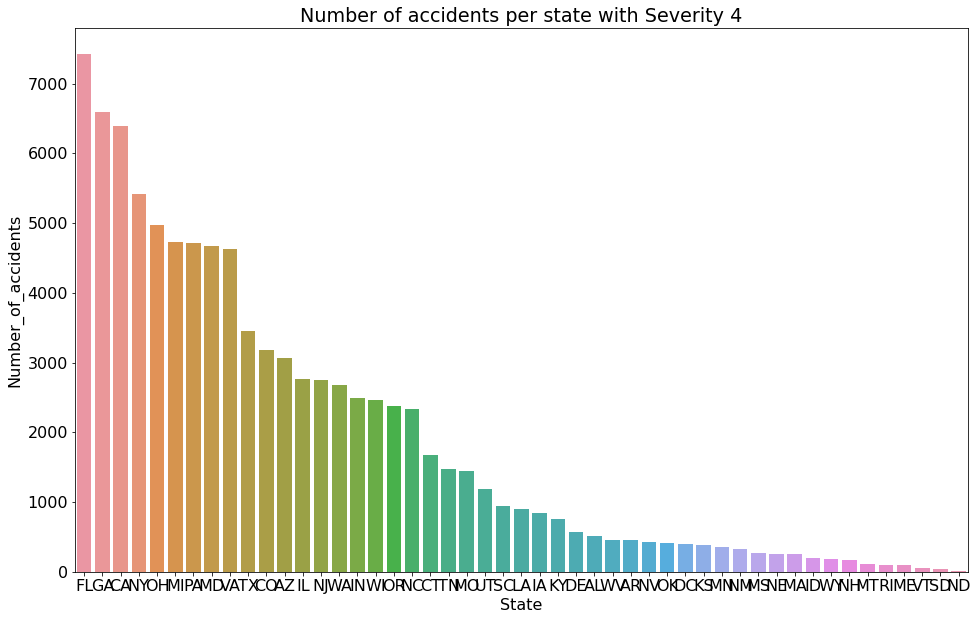

In [145]:
accidents_per_state_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'State').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
plt.figure(figsize=(16,10))
sns.barplot(x="State",y="Number_of_accidents",data=accidents_per_state_severity_4)
plt.title('Number of accidents per state with Severity 4')

Here, we can see that California shifted to 3rd position for the accidents with severity 4, but most surprisingly Georgia was 2nd in terms of most severe accidents.

# Top 10 counties with highest number of accidents

In [146]:
county_accidents_count=column_group_count(usa_accident_data_filtered,'County')
county_accidents_count=county_accidents_count.sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
county_accidents_count

,County,Number_of_accidents
0,Los Angeles,227180
1,Harris,99134
2,Orange,75970
3,Mecklenburg,72762
4,Dallas,68558
...,...,...
1708,Hand,1
1709,Frontier,1
1710,Brewster,1
1711,Towns,1


In [147]:
counties_with_more_number_of_accidents=county_accidents_count.head(10)
counties_with_more_number_of_accidents

,County,Number_of_accidents
0,Los Angeles,227180
1,Harris,99134
2,Orange,75970
3,Mecklenburg,72762
4,Dallas,68558
5,Travis,63603
6,Montgomery,57256
7,Wake,52640
8,Maricopa,45524
9,Alameda,45367


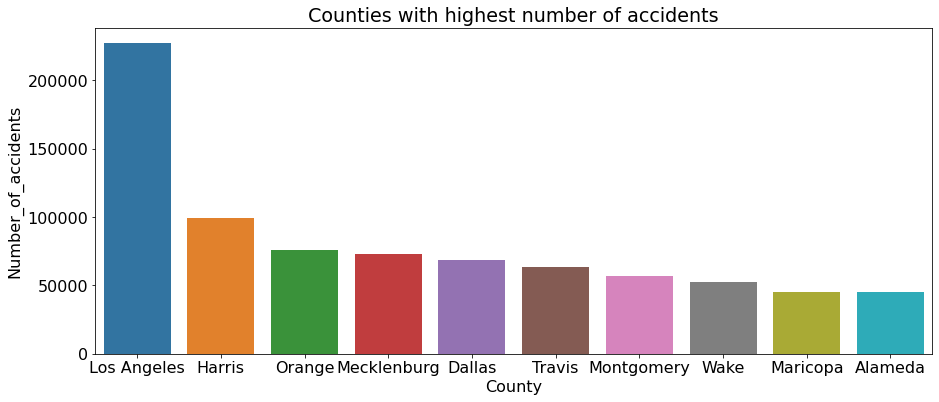

In [148]:
plt.figure(figsize=(15,6))
plt.title('Counties with highest number of accidents')
plt.xlabel('County')
plt.ylabel('Number of accidents')
sns.barplot(counties_with_more_number_of_accidents['County'],counties_with_more_number_of_accidents['Number_of_accidents'])
plt.show()

As we can see that the Los Angeles county has highest number of accidents, which is more than double the number of accidents in any other county. It is surprisingly hugh number!

## Top 10 Counties with most number of accidents accoding to severity

In [149]:
accidents_per_county_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'County').sort_values(by='Number_of_accidents',ascending=False)
counties_with_more_number_of_accidents_severity_1=accidents_per_county_severity_1.head(10)
counties_with_more_number_of_accidents_severity_1

,County,Number_of_accidents
102,Harris,50
136,Los Angeles,46
179,Orange,25
216,San Diego,24
55,Dallas,22
222,Santa Clara,22
2,Alameda,21
122,King,19
204,Riverside,17
161,Montgomery,15


In [150]:
accidents_per_county_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'County').sort_values(by='Number_of_accidents',ascending=False)
counties_with_more_number_of_accidents_severity_2=accidents_per_county_severity_2.head(10)
counties_with_more_number_of_accidents_severity_2

,County,Number_of_accidents
858,Los Angeles,137274
643,Harris,75771
941,Mecklenburg,67489
1469,Travis,55622
1077,Orange,53883
987,Montgomery,45581
1527,Wake,44401
390,Dallas,40826
895,Maricopa,35056
1260,Sacramento,28957


In [151]:
accidents_per_county_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'County').sort_values(by='Number_of_accidents',ascending=False)
counties_with_more_number_of_accidents_severity_3=accidents_per_county_severity_3.head(10)
counties_with_more_number_of_accidents_severity_3

,County,Number_of_accidents
701,Los Angeles,87614
324,Dallas,27054
11,Alameda,23792
524,Harris,22269
885,Orange,20546
1053,San Diego,17360
445,Fulton,17251
1052,San Bernardino,14222
287,Cook,13869
600,Jefferson,12981


In [152]:
accidents_per_county_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'County').sort_values(by='Number_of_accidents',ascending=False)
counties_with_more_number_of_accidents_severity_4=accidents_per_county_severity_4.head(10)
counties_with_more_number_of_accidents_severity_4

,County,Number_of_accidents
785,Los Angeles,2246
869,Miami-Dade,1762
818,Maricopa,1704
984,Orange,1516
315,Cook,1271
491,Fulton,1197
898,Montgomery,1177
481,Franklin,1069
669,Jefferson,1058
705,King,1045


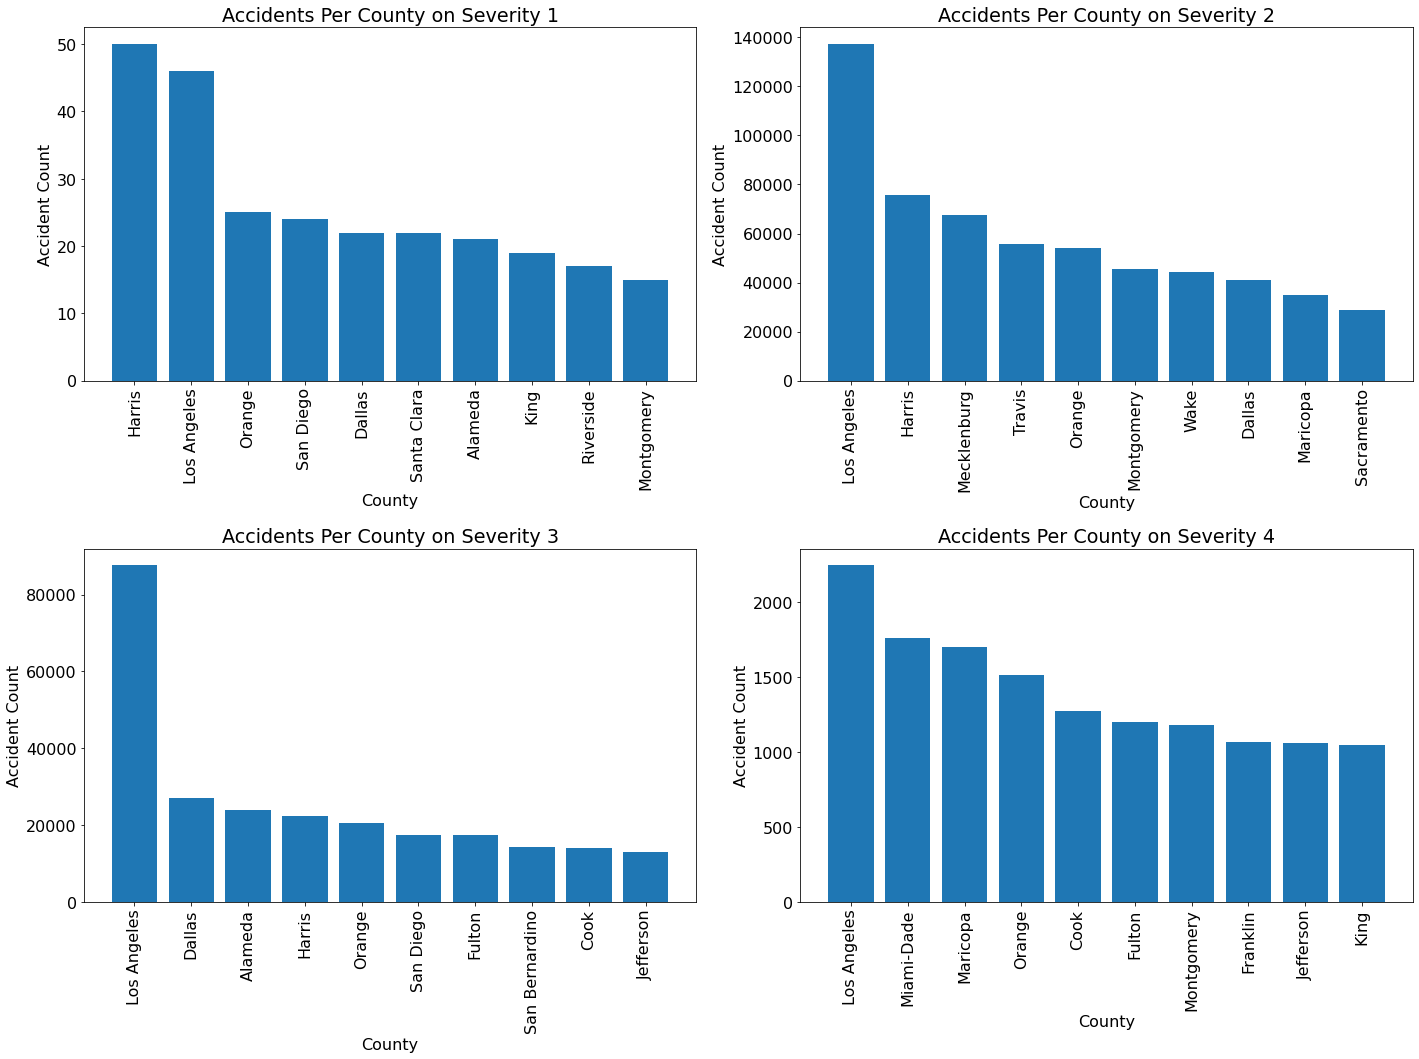

In [153]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(20,15))
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_1,'County',ax1,1,90)
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_2,'County',ax2,2,90)
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_3,'County',ax3,3,90)
bar_plot_by_severity(counties_with_more_number_of_accidents_severity_4,'County',ax4,4,90)
plt.tight_layout()

# Top 10 cities with highest number of accidents

In [154]:
city_accidents_count=column_group_count(usa_accident_data_filtered,'City')
city_accidents_count=city_accidents_count.sort_values(by='Number_of_accidents',ascending=False).reset_index(drop=True)
city_accidents_count

,City,Number_of_accidents
0,Houston,93289
1,Charlotte,68054
2,Los Angeles,65851
3,Austin,58703
4,Dallas,58036
...,...,...
11680,Long Island,1
11681,Trout Lake,1
11682,Long Eddy,1
11683,Tropic,1


In [155]:
top_cities_accidents_count=city_accidents_count.head(10)
top_cities_accidents_count

,City,Number_of_accidents
0,Houston,93289
1,Charlotte,68054
2,Los Angeles,65851
3,Austin,58703
4,Dallas,58036
5,Raleigh,39628
6,Atlanta,37591
7,Miami,31160
8,Oklahoma City,30787
9,Baton Rouge,30232


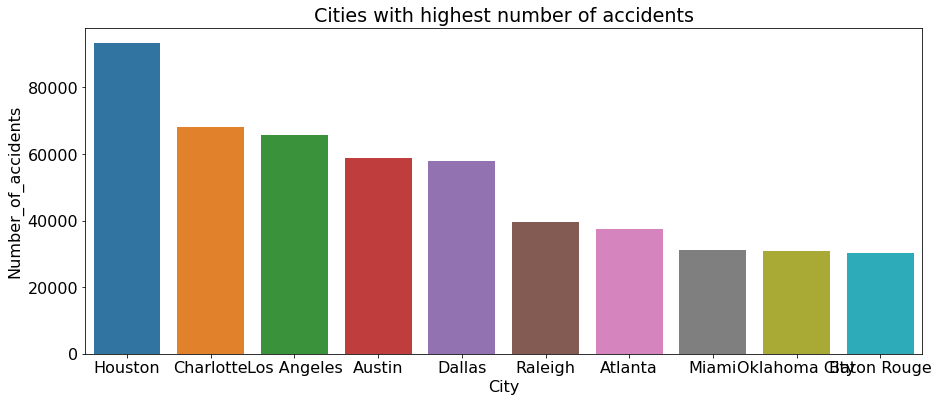

In [156]:
plt.figure(figsize=(15,6))
plt.title('Cities with highest number of accidents')
plt.xlabel('City')
plt.ylabel('Number of accidents')
sns.barplot(top_cities_accidents_count['City'],top_cities_accidents_count['Number_of_accidents'])
plt.show()

Even though Los Angeles county was 1sr in highest number of accidents, the city itself is iat 3rd position for number of accidents. Surprisingly 3 cities of Texas: Houston, Austin and Dallas are in top 5 cities with highest number of accidents. While 2 main cities of NC are also in the list.

## Top 10 Cities with most number of accidents accoding to severity

In [157]:
accidents_per_city_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'City').sort_values(by='Number_of_accidents',ascending=False)
cities_with_more_number_of_accidents_severity_1=accidents_per_city_severity_1.head(10)
cities_with_more_number_of_accidents_severity_1

,City,Number_of_accidents
234,Houston,48
121,Dallas,18
289,Los Angeles,16
80,Charlotte,13
20,Atlanta,13
26,Austin,12
367,Orlando,11
361,Oklahoma City,11
442,San Jose,10
440,San Diego,9


In [158]:
accidents_per_city_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'City').sort_values(by='Number_of_accidents',ascending=False)
cities_with_more_number_of_accidents_severity_2=accidents_per_city_severity_2.head(10)
cities_with_more_number_of_accidents_severity_2

,City,Number_of_accidents
4359,Houston,72431
1594,Charlotte,63360
376,Austin,51379
5396,Los Angeles,39115
2239,Dallas,36449
7782,Raleigh,32854
6934,Oklahoma City,27051
518,Baton Rouge,25610
7034,Orlando,20895
6408,Nashville,20215


In [159]:
accidents_per_city_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'City').sort_values(by='Number_of_accidents',ascending=False)
cities_with_more_number_of_accidents_severity_3=accidents_per_city_severity_3.head(10)
cities_with_more_number_of_accidents_severity_3

,City,Number_of_accidents
3396,Los Angeles,26186
220,Atlanta,22495
1388,Dallas,21081
2753,Houston,20056
2868,Jacksonville,10601
3800,Minneapolis,10506
3742,Miami,9980
5206,San Diego,9624
5171,Saint Paul,8125
4016,Nashville,7421


In [160]:
accidents_per_city_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'City').sort_values(by='Number_of_accidents',ascending=False)
cities_with_more_number_of_accidents_severity_4=accidents_per_city_severity_4.head(10)
cities_with_more_number_of_accidents_severity_4

,City,Number_of_accidents
4212,Miami,1497
260,Atlanta,1382
3081,Houston,754
1361,Columbus,720
1186,Chicago,678
4982,Orlando,660
6070,Seattle,605
5245,Phoenix,603
3214,Jacksonville,579
3825,Los Angeles,534


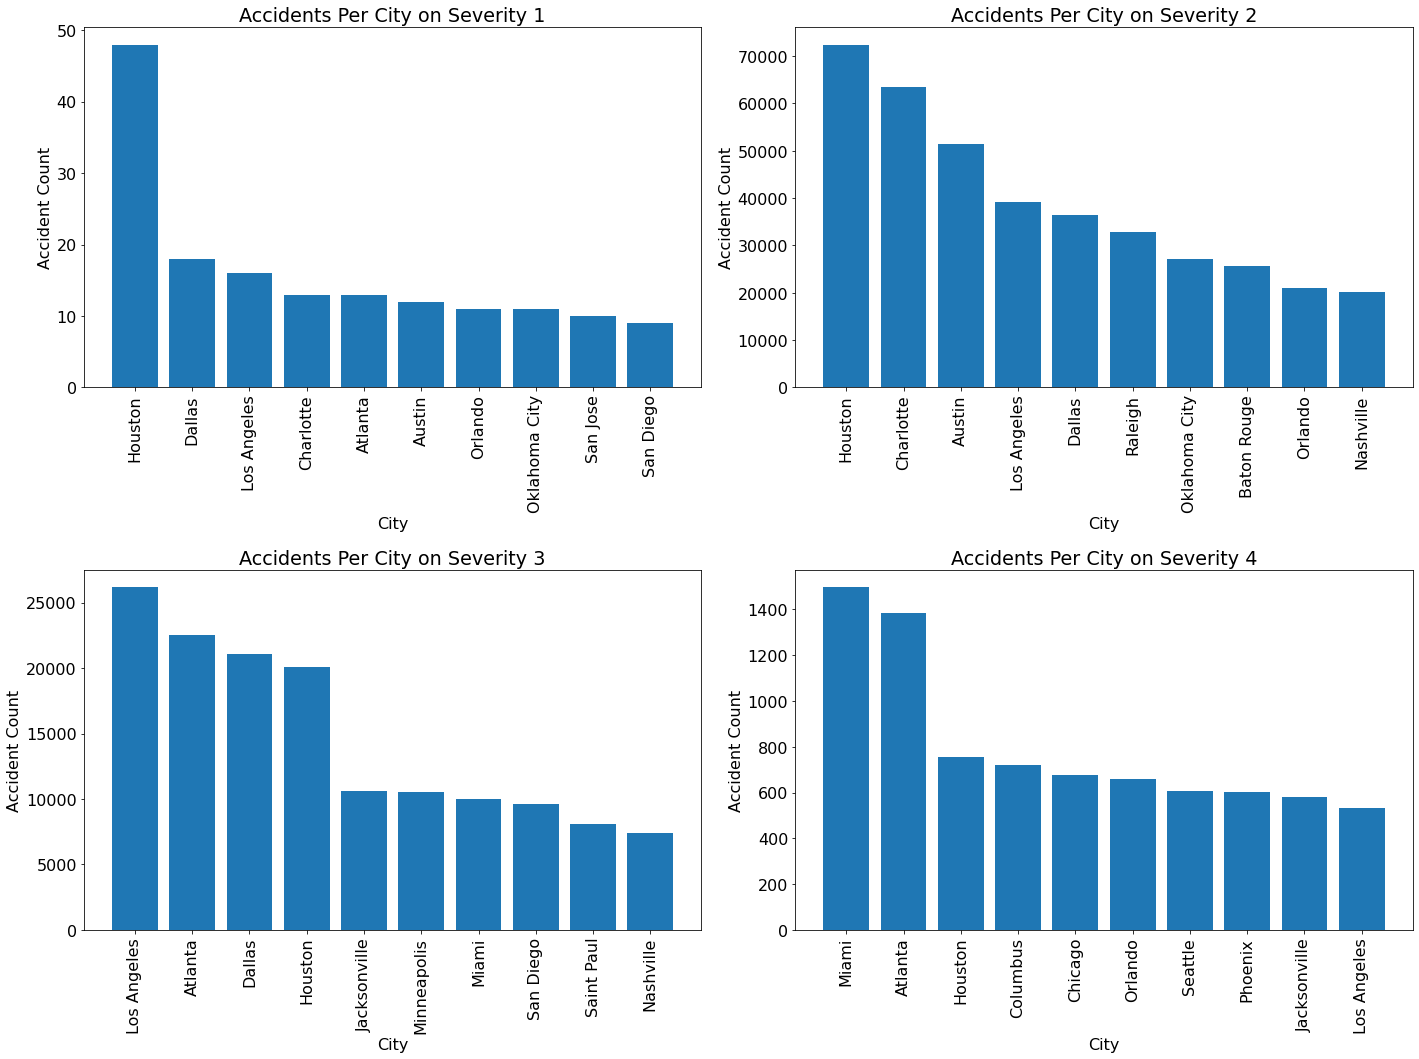

In [161]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(20,15))
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_1,'City',ax1,1,90)
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_2,'City',ax2,2,90)
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_3,'City',ax3,3,90)
bar_plot_by_severity(cities_with_more_number_of_accidents_severity_4,'City',ax4,4,90)
plt.tight_layout()

## How many accidents occur in day and night?

In [162]:
day_night_accidents_count=column_group_count(usa_accident_data_filtered,'Sunrise_Sunset')
day_night_accidents_count

,Sunrise_Sunset,Number_of_accidents
0,Day,2194084
1,Night,780158


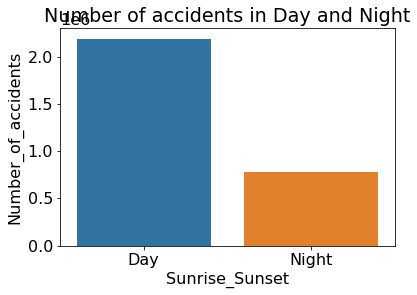

In [163]:
plt.title('Number of accidents in Day and Night')
plt.xlabel('Time')
plt.ylabel('Number of accidents')
sns.barplot(day_night_accidents_count['Sunrise_Sunset'],day_night_accidents_count['Number_of_accidents'])
plt.show()

We can clearly see that most of the accidents occur in the sun light.

## How many accidents occur in each year?

In [164]:
per_year_accidents_count=column_group_count(usa_accident_data_filtered,'Year')
per_year_accidents_count

,Year,Number_of_accidents
0,2015,1
1,2016,410600
2,2017,717483
3,2018,892615
4,2019,953630
5,2020,6


In [165]:
# As we can see that we have so much small data of 2015 and 2020, we should not consider them 
per_year_accidents_count=per_year_accidents_count[(per_year_accidents_count['Year']!=2015) & (per_year_accidents_count['Year']!=2020)]
per_year_accidents_count

,Year,Number_of_accidents
1,2016,410600
2,2017,717483
3,2018,892615
4,2019,953630


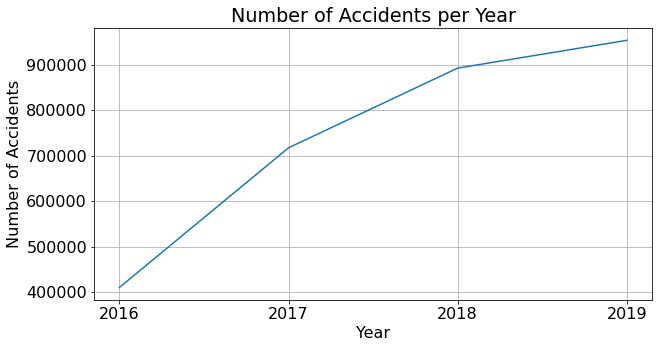

In [166]:
plt.figure(figsize=(10,5))
plt.plot(per_year_accidents_count['Year'],per_year_accidents_count['Number_of_accidents'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.xticks(range(2016,2020))
plt.title('Number of Accidents per Year')
plt.show()

By examining the graph, we can say that number of accidents are increasing significantly every year. 2019 has more that double the number of accidents, compare to 2016.

## How many accidents occur in each month?

In [167]:
per_month_accidents_count=column_group_count(usa_accident_data_filtered,'Month')
per_month_accidents_count

,Month,Number_of_accidents
0,1,209972
1,2,198649
2,3,207427
3,4,211763
4,5,209060
5,6,210025
6,7,222959
7,8,288912
8,9,292430
9,10,324525


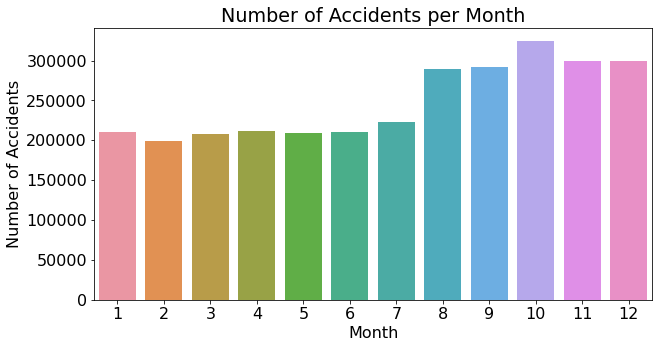

In [168]:
plt.figure(figsize=(10,5))
sns.barplot(per_month_accidents_count['Month'],per_month_accidents_count['Number_of_accidents'])
plt.xlabel('Month')
plt.xticks(range(0,12))
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month')
plt.show()

The number of accidents is showing a significant increase during last 5 months of a year, with a peak in october.

## How Month affects Severity

In [169]:
accidents_per_month_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Month')
accidents_per_month_severity_1

,Month,Number_of_accidents
0,1,56
1,2,79
2,3,64
3,4,58
4,5,71
5,6,90
6,7,79
7,8,105
8,9,97
9,10,91


In [170]:
accidents_per_month_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Month')
accidents_per_month_severity_2

,Month,Number_of_accidents
0,1,135962
1,2,129973
2,3,135713
3,4,139305
4,5,137597
5,6,132654
6,7,144107
7,8,193419
8,9,201901
9,10,229577


In [171]:
accidents_per_month_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Month')
accidents_per_month_severity_3

,Month,Number_of_accidents
0,1,66865
1,2,62043
2,3,64618
3,4,65642
4,5,64016
5,6,69845
6,7,70772
7,8,87390
8,9,82684
9,10,86064


In [172]:
accidents_per_month_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Month')
accidents_per_month_severity_4

,Month,Number_of_accidents
0,1,7089
1,2,6554
2,3,7032
3,4,6758
4,5,7376
5,6,7436
6,7,8001
7,8,7998
8,9,7748
9,10,8793


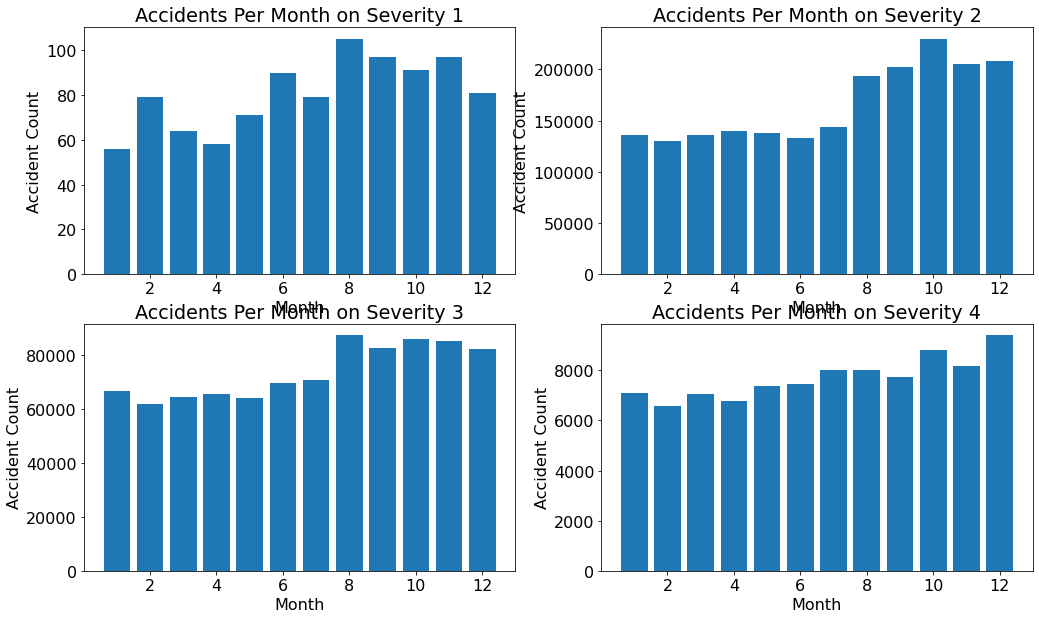

In [173]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(17,10))
bar_plot_by_severity(accidents_per_month_severity_1,'Month',ax1,1,0)
bar_plot_by_severity(accidents_per_month_severity_2,'Month',ax2,2,0)
bar_plot_by_severity(accidents_per_month_severity_3,'Month',ax3,3,0)
bar_plot_by_severity(accidents_per_month_severity_4,'Month',ax4,4,0)

## How many accidents occur in each hour?

In [174]:
Weekday_data=usa_accident_data_filtered[(usa_accident_data_filtered['Week_day']==0) |(usa_accident_data_filtered['Week_day']==1) |(usa_accident_data_filtered['Week_day']==2) |(usa_accident_data_filtered['Week_day']==3) |(usa_accident_data_filtered['Week_day']==4)]

In [175]:
weekday_per_hour_accidents_count=column_group_count(Weekday_data,'Hour')
weekday_per_hour_accidents_count

,Hour,Number_of_accidents
0,0,16538
1,1,12305
2,2,12350
3,3,13087
4,4,47141
5,5,76852
6,6,159076
7,7,260278
8,8,270625
9,9,161704


In [176]:
Weekend_data=usa_accident_data_filtered[(usa_accident_data_filtered['Week_day']==5) | (usa_accident_data_filtered['Week_day']==6)]

In [177]:
weekend_per_hour_accidents_count=column_group_count(Weekend_data,'Hour')
weekend_per_hour_accidents_count

,Hour,Number_of_accidents
0,0,6651
1,1,5695
2,2,6594
3,3,5513
4,4,6453
5,5,7014
6,6,10003
7,7,13228
8,8,13649
9,9,15764


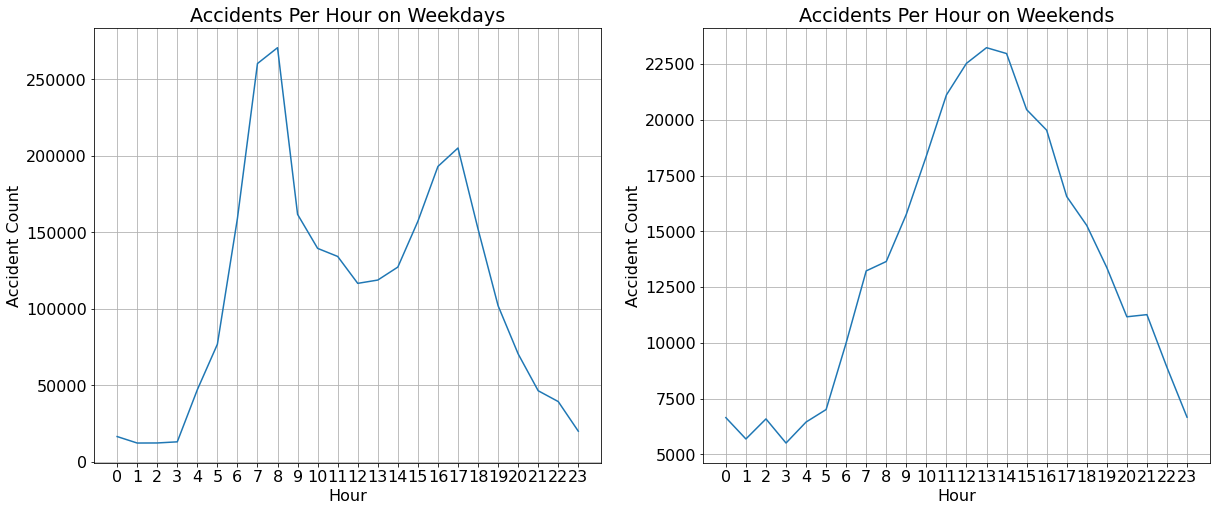

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
ax1.plot(weekday_per_hour_accidents_count['Hour'],weekday_per_hour_accidents_count['Number_of_accidents'])
ax1.set_title("Accidents Per Hour on Weekdays" )
ax1.set_xlabel("Hour")
ax1.set_ylabel("Accident Count")
ax1.set_xticks(range(0,24))
ax1.grid()

ax2.set_title("Accidents Per Hour on Weekends" )
ax2.set_xlabel("Hour")
ax2.set_ylabel("Accident Count")
ax2.set_xticks(range(0,24))
ax2.plot(weekend_per_hour_accidents_count['Hour'],weekend_per_hour_accidents_count['Number_of_accidents'])
ax2.grid()
plt.show()

As we can clearly see that accidents peak hour changes during weekdays and weekends. During weekdays, most of accidents occur between 7-8 in the morning and 4-5 in the evening. It may be because at that time most of the people are whether going to or coming back from their work . While, during weekends it is completely different. Most of the accidents occur between 12-2 in the morning.

## How Day affect severity

In [179]:
per_day_accidents_count=column_group_count(usa_accident_data_filtered,'Week_day')
per_day_accidents_count.Week_day.replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],inplace=True)
per_day_accidents_count=per_day_accidents_count.sort_values(by='Number_of_accidents',ascending=False)
per_day_accidents_count

,Week_day,Number_of_accidents
1,Tue,543725
4,Fri,537749
2,Wed,537474
3,Thu,526138
0,Mon,507255
5,Sat,170349
6,Sun,151645


Text(0.5, 1.0, 'Number of Accidents per Week Day')

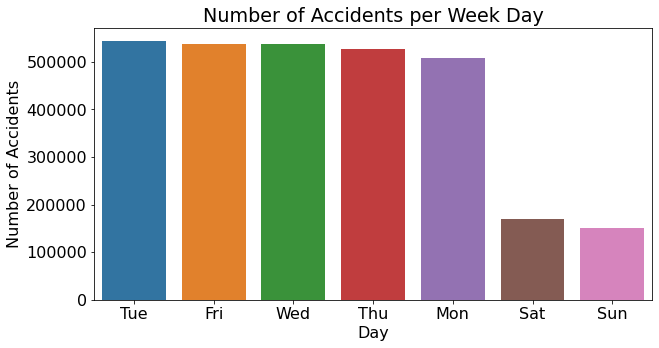

In [180]:
plt.figure(figsize=(10,5))
sns.barplot(per_day_accidents_count['Week_day'],per_day_accidents_count['Number_of_accidents'])
plt.xlabel('Day')
plt.xticks(range(0,7))
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Week Day')

We can clearly see that most of the accidents have occured during weekdays. While during weekend, the number of accidents have decrease the less than half the number of accidents than weekdays.

## How Day affects Severity

In [181]:
accidents_per_day_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Week_day')
accidents_per_day_severity_1

,Week_day,Number_of_accidents
0,0,190
1,1,153
2,2,169
3,3,152
4,4,183
5,5,62
6,6,59


In [182]:
accidents_per_day_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Week_day')
accidents_per_day_severity_2

,Week_day,Number_of_accidents
0,0,352093
1,1,378499
2,2,374204
3,3,362216
4,4,366648
5,5,84691
6,6,75059


In [183]:
accidents_per_day_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Week_day')
accidents_per_day_severity_3

,Week_day,Number_of_accidents
0,0,140436
1,1,150179
2,2,148761
3,3,149546
4,4,156042
5,5,75630
6,6,67026


In [184]:
accidents_per_day_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Week_day')
accidents_per_day_severity_4

,Week_day,Number_of_accidents
0,0,14536
1,1,14894
2,2,14340
3,3,14224
4,4,14876
5,5,9966
6,6,9501


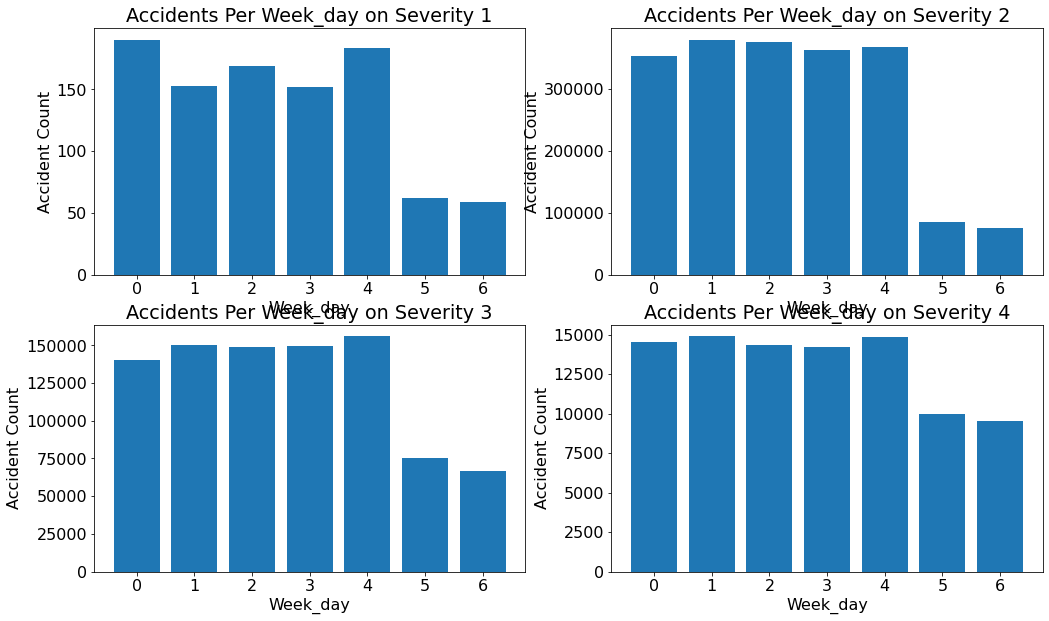

In [185]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(17,10))
bar_plot_by_severity(accidents_per_day_severity_1,'Week_day',ax1,1,0)
bar_plot_by_severity(accidents_per_day_severity_2,'Week_day',ax2,2,0)
bar_plot_by_severity(accidents_per_day_severity_3,'Week_day',ax3,3,0)
bar_plot_by_severity(accidents_per_day_severity_4,'Week_day',ax4,4,0)

## How Weather affects accidents

In [186]:
per_weather_accidents_count=column_group_count(usa_accident_data_filtered,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
per_weather_accidents_count=per_weather_accidents_count.head(15)
per_weather_accidents_count

,Weather_Condition,Number_of_accidents
0,Clear,808171
1,Mostly Cloudy,412528
2,Overcast,382480
3,Fair,335289
4,Partly Cloudy,295439
5,Scattered Clouds,204662
6,Light Rain,141073
7,Cloudy,115496
8,Light Snow,42123
9,Haze,34315


<BarContainer object of 15 artists>

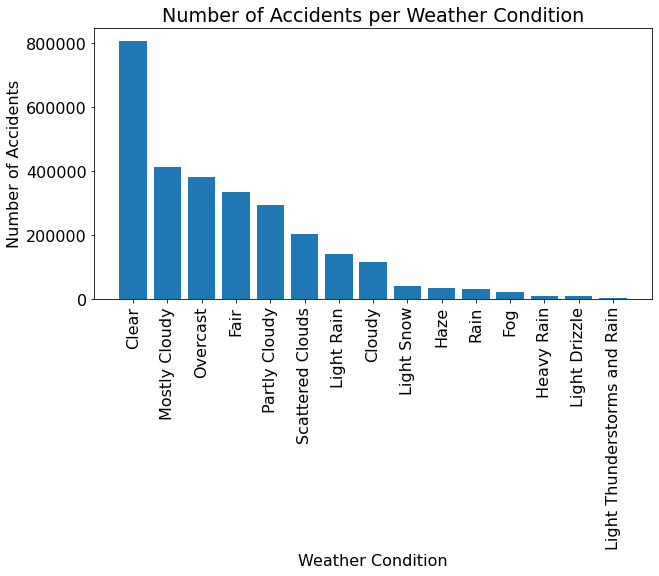

In [187]:
plt.figure(figsize=(10,5))
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Weather Condition')
plt.xticks(rotation=90)
plt.bar(per_weather_accidents_count['Weather_Condition'],per_weather_accidents_count['Number_of_accidents'])

As we can see that most of the accidents have occured during clear weather. It is followed by, Mostly cloudly, Overcast, Fair and Partly Cloudy weathers. Surprisingly Fog hasn't caused that much accidents, compare to other top weather conditions.

## How Weather affects Severity

In [188]:
accidents_per_weather_condition_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_1=accidents_per_weather_condition_severity_1.head(15)
accidents_per_weather_condition_severity_1

,Weather_Condition,Number_of_accidents
0,Clear,337
1,Mostly Cloudy,137
2,Overcast,115
3,Partly Cloudy,95
4,Fair,74
5,Scattered Clouds,73
6,Light Rain,40
7,Cloudy,22
8,Rain,11
9,Light Snow,9


In [189]:
accidents_per_weather_condition_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_2=accidents_per_weather_condition_severity_2.head(15)
accidents_per_weather_condition_severity_2

,Weather_Condition,Number_of_accidents
0,Clear,536508
1,Mostly Cloudy,272307
2,Fair,253238
3,Overcast,248636
4,Partly Cloudy,199668
5,Scattered Clouds,132613
6,Light Rain,90480
7,Cloudy,83966
8,Light Snow,24858
9,Haze,22450


In [190]:
accidents_per_weather_condition_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_3=accidents_per_weather_condition_severity_3.head(15)
accidents_per_weather_condition_severity_3

,Weather_Condition,Number_of_accidents
0,Clear,244865
1,Mostly Cloudy,128741
2,Overcast,119881
3,Partly Cloudy,88409
4,Fair,72440
5,Scattered Clouds,66012
6,Light Rain,46382
7,Cloudy,28030
8,Light Snow,14978
9,Rain,11770


In [191]:
accidents_per_weather_condition_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Weather_Condition').sort_values(ascending=False,by='Number_of_accidents').reset_index(drop=True)
accidents_per_weather_condition_severity_4=accidents_per_weather_condition_severity_4.head(15)
accidents_per_weather_condition_severity_4

,Weather_Condition,Number_of_accidents
0,Clear,26461
1,Overcast,13848
2,Mostly Cloudy,11343
3,Fair,9537
4,Partly Cloudy,7267
5,Scattered Clouds,5964
6,Light Rain,4171
7,Cloudy,3478
8,Light Snow,2278
9,Rain,860


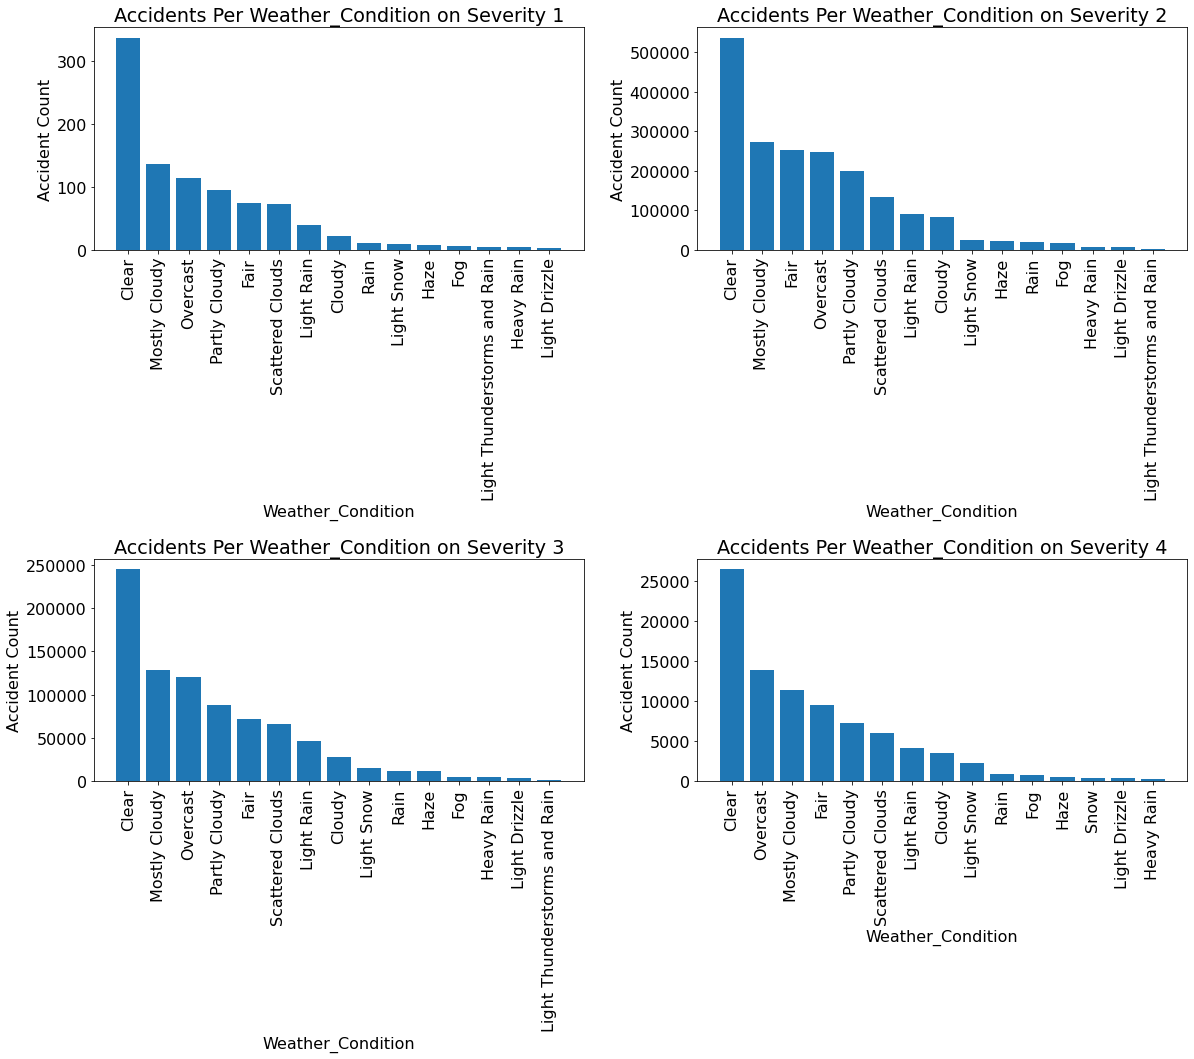

In [192]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(17,15))
bar_plot_by_severity(accidents_per_weather_condition_severity_1,'Weather_Condition',ax1,1,90)
bar_plot_by_severity(accidents_per_weather_condition_severity_2,'Weather_Condition',ax2,2,90)
bar_plot_by_severity(accidents_per_weather_condition_severity_3,'Weather_Condition',ax3,3,90)
bar_plot_by_severity(accidents_per_weather_condition_severity_4,'Weather_Condition',ax4,4,90)
plt.tight_layout()

## Change copied
Across all levels of severity, most accidents happen under clear, cloudy, fair or similar weather conditions. These conditions are considered benign compared to rain and snow, Perhaps they are the most frequent conditions. Light rain and light snow are the top adverse weather conditions. Most likely these cause accidents since they can make roads slippery without causing concern in the drivers.

# How long the accident affected roads.

In [193]:
usa_accident_data_filtered['road_affected_by_accident_hours'] = (pd.DatetimeIndex(usa_accident_data_filtered['End_Time']) - pd.DatetimeIndex(usa_accident_data_filtered['Start_Time'])).seconds/3600
usa_accident_data_filtered_sorted_duration=usa_accident_data_filtered.sort_values(by='road_affected_by_accident_hours',ascending=False)

In [194]:
usa_accident_data_filtered_sorted_duration['road_affected_by_accident_hours']=usa_accident_data_filtered_sorted_duration['road_affected_by_accident_hours'].apply(np.ceil)
usa_accident_data_filtered_sorted_duration.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Week_day,Week,Hour,road_affected_by_accident_hours
2736677,A-2736701,Bing,3,2018-09-21 06:43:47,2018-09-25 06:43:45,39.795550,-86.120350,0.489,At Rural St/Keystone Way/Exit 85 - Accident. M...,I-70 E,...,False,False,False,Night,2018,9,4,38,6,24.0
2966536,A-2966560,Bing,2,2019-08-07 15:52:19,2019-08-11 15:52:16,39.200620,-85.954341,0.119,At I-65 - Accident involving heavy truck. Road...,W Jonathan Moore Pike,...,False,False,False,Day,2019,8,2,32,15,24.0
2941372,A-2941396,Bing,3,2019-06-29 23:14:35,2019-07-03 23:14:31,28.525502,-81.386320,0.294,Between Kaley Ave/Exit 81 and SR-408/Exit 82 -...,I-4 E,...,False,False,False,Night,2019,6,5,26,23,24.0
2550441,A-2550465,Bing,2,2019-10-23 08:55:42,2019-10-27 08:55:37,43.571940,-116.228540,0.258,At Vista Ave/Exit 53 - Accident. Roadwork.,I-84 E,...,False,False,False,Day,2019,10,2,43,8,24.0
2954619,A-2954643,Bing,2,2019-07-12 11:04:29,2019-07-16 11:04:24,43.600860,-116.577640,0.462,At ID-55/Nampa Blvd/Exit 35 - Accident. Roadwork.,Vietnam Veterans Memorial Hwy,...,False,False,False,Day,2019,7,4,28,11,24.0


In [195]:
duration_count=column_group_count(usa_accident_data_filtered_sorted_duration,'road_affected_by_accident_hours')
duration_count.head()

,road_affected_by_accident_hours,Number_of_accidents
0,0.0,8
1,1.0,2122575
2,2.0,332111
3,3.0,60596
4,4.0,63828


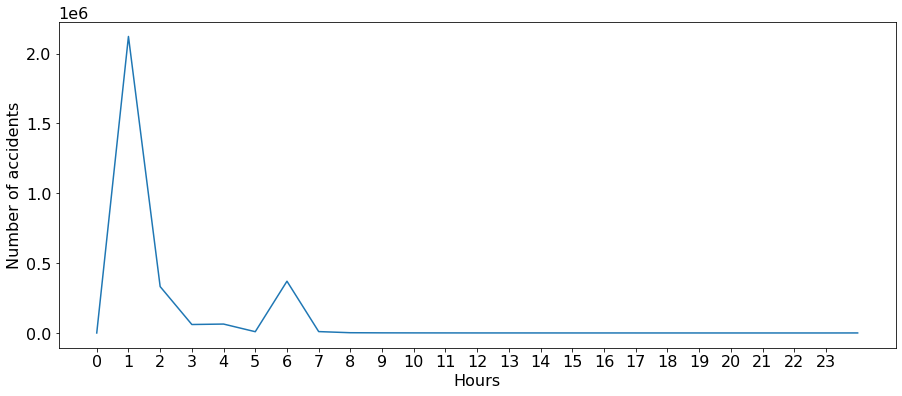

In [196]:
plt.figure(figsize=(15,6))
plt.plot(duration_count['road_affected_by_accident_hours'],duration_count['Number_of_accidents'])
plt.xlabel('Hours')
plt.ylabel('Number of accidents')
plt.xticks(range(24))
plt.show()

We can clearly see that most accidents affected the road for about an hour. While, the highest amount of hours the road affected was more than 23h.

## How Weather factors such as Temperature,Humidity,Pressure,Visibility, Wind Direction, Wind Speed affect the severity of the accident

### Temperature

In [197]:
# plt.plot(new['Humidity(%)'],new['Severity'])

# usa_accident_data_filtered.columns

# accidents_per_temperature_severity_1=accidents_per_severity(usa_accident_data_filtered,1,'Temperature(F)')
# accidents_per_temperature_severity_2=accidents_per_severity(usa_accident_data_filtered,2,'Temperature(F)')
# accidents_per_temperature_severity_3=accidents_per_severity(usa_accident_data_filtered,3,'Temperature(F)')
# accidents_per_temperature_severity_4=accidents_per_severity(usa_accident_data_filtered,4,'Temperature(F)')

# fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(40,30))
# line_plot_by_severity(accidents_per_temperature_severity_1,'Temperature(F)',ax1,1,90)
# line_plot_by_severity(accidents_per_temperature_severity_2,'Temperature(F)',ax2,2,90)
# line_plot_by_severity(accidents_per_temperature_severity_3,'Temperature(F)',ax3,3,90)
# line_plot_by_severity(accidents_per_temperature_severity_4,'Temperature(F)',ax4,4,90)
# plt.tight_layout()

# def mean_severity(df,factor):
#     # removing some extreme values
#     factor_min_value=df[factor].quantile(q=0.0001)
#     factor_max_value=df[factor].quantile(q=0.9999)
#     df["Severity"].groupby(pd.cut(df[factor], np.linspace(factor_min_value,factor_max_value,num=20))).mean().plot()
#     plt.title("Mean Severity as a Function of " + factor)
#     plt.xlabel(factor + " Range")
#     plt.ylabel("Mean Severity")
#     plt.show()

# mean_severity(usa_accident_data_filtered,'Temperature(F)')

# mean_severity(usa_accident_data_filtered,'Temperature(F)')

# factors = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
# df=usa_accident_data_filtered
# for factor in factors:
#     # remove some of the extreme values
#     factorMin = df[factor].quantile(q=0.0001)
#     factorMax = df[factor].quantile(q=0.9999)
#     # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
#     plt.subplots(figsize=(15,5))
#     for s in np.arange(1,5):
#         df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
#         plt.title("Mean Severity as a Function of " + factor, fontsize=16)
#         plt.xlabel(factor + " Range", fontsize=16)
#         plt.ylabel("Mean Severity", fontsize=16)
#         plt.xticks(fontsize=11)
#         plt.yticks(fontsize=16)

# np.linspace(factor_min_value,factor_max_value,num=20)

# new=pd.DataFrame(df["Severity"].groupby(pd.cut(usa_accident_data_filtered['Humidity(%)'], np.linspace(factorMin,factorMax,num=20))).mean())
# # x=new.index
# # y=new.values
# new=new.reset_index()
# new

## Where the accidents have occured

In [198]:
infrastructure_dict={}
features=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for feature in features:
    accidents_at_traffic_signal_count=column_group_count(usa_accident_data_filtered,feature)
    accidents_at_traffic_signal_count=accidents_at_traffic_signal_count[accidents_at_traffic_signal_count[feature]==True]
    accidents_at_traffic_signal_count
    infrastructure_dict[feature]=accidents_at_traffic_signal_count.iloc[0,1]
infrastructure_dict

{'Bump': 454,
 'Crossing': 207590,
 'Give_Way': 7627,
 'Junction': 238447,
 'No_Exit': 3395,
 'Railway': 25161,
 'Roundabout': 168,
 'Station': 56413,
 'Stop': 40160,
 'Traffic_Calming': 1111,
 'Traffic_Signal': 503383}

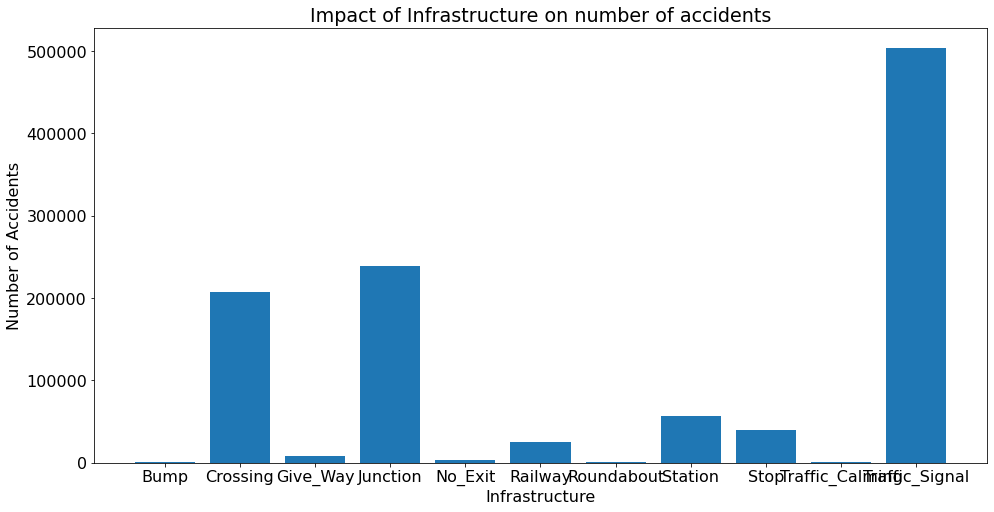

In [199]:
plt.figure(figsize=(16,8))
plt.bar(infrastructure_dict.keys(),infrastructure_dict.values())
plt.xlabel('Infrastructure')
plt.ylabel('Number of Accidents')
plt.title('Impact of Infrastructure on number of accidents')
plt.show()

As we can see that most of the accidents have occured at Traffic Signal, followed by Junction and Crossing. We can say that most of the accidents are occuring because people are not following traffic signal properly.

## Impact of Infrastructure on Severity of accidents

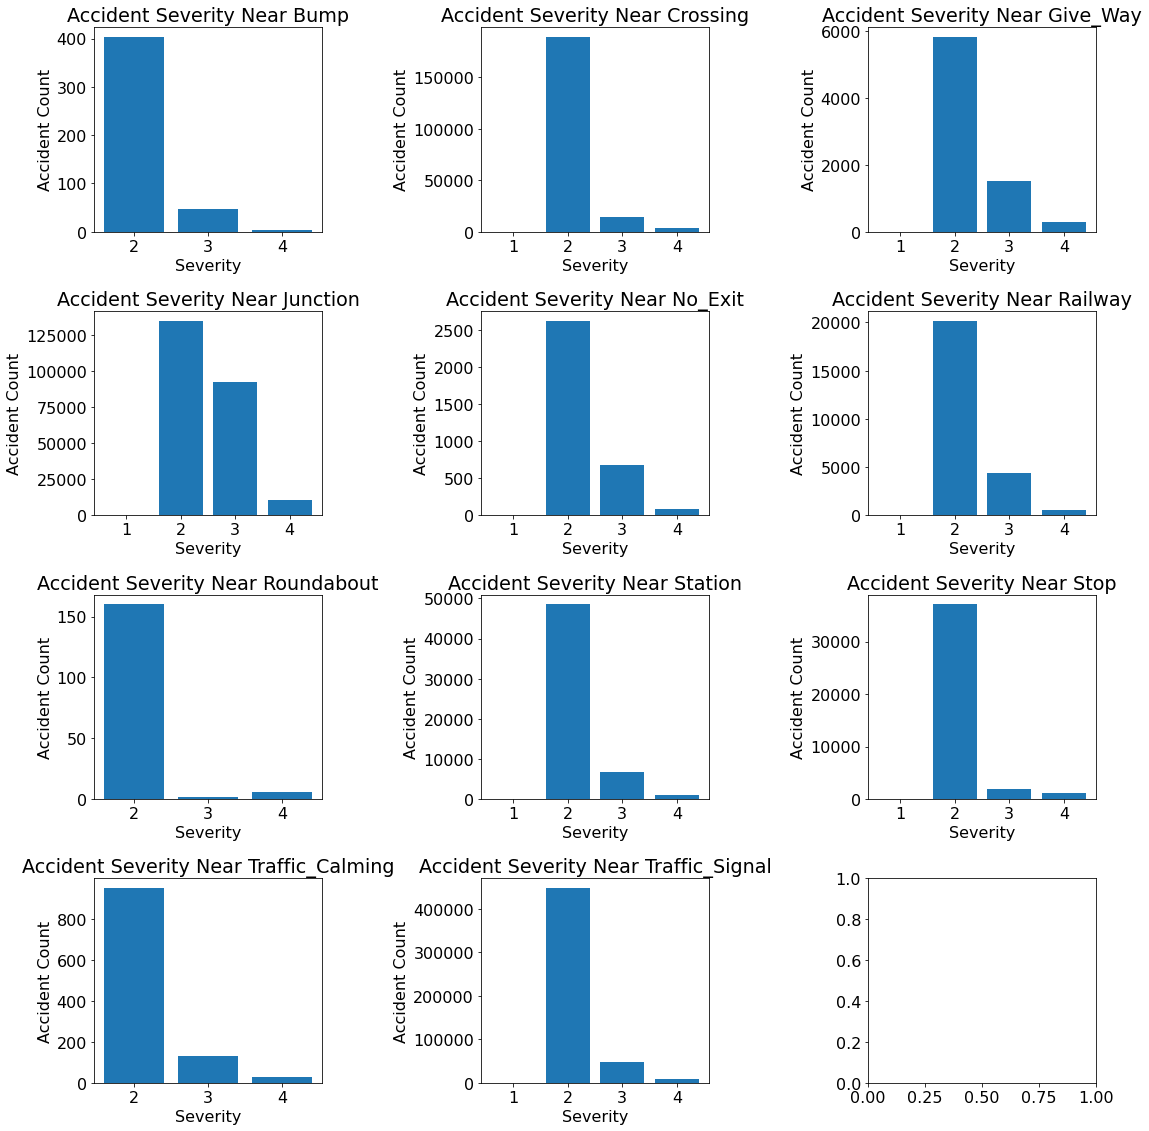

In [200]:
fig, ((ax1, ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4, 3,figsize=(16,16))
subplots=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
curr_index=0
features=['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for feature in features:
    subplot=subplots[curr_index]
    subplot.set_title("Accident Severity Near "+ feature)
    subplot.set_xlabel('Severity')
    subplot.set_ylabel("Accident Count")
    curr_index+=1
    subplot.set_xticks(range(1,5,1))
    plot=usa_accident_data_filtered.loc[usa_accident_data_filtered[feature] == True]['Severity'].value_counts()
    subplot.bar(plot.index,plot.values)
plt.tight_layout()
plt.show()

## How Severity affect the distance

In [201]:
## Top 10 county with highest number of accidents (per year, per severity)
# check this https://www.kaggle.com/sidharthkumar/what-causes-accidents

In [202]:
# how visibility affects the severity of accidents
